In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content/yolov12


In [3]:
!git clone https://github.com/sunsmarterjie/yolov12
%cd yolov12
!pip install -r requirements.txt
!pip install -e .
!pip install ultralytics supervision opencv-python torch torchvision torchaudio flash-attn --upgrade -q

Cloning into 'yolov12'...
remote: Enumerating objects: 714, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 714 (delta 5), reused 2 (delta 2), pack-reused 707 (from 2)
Receiving objects: 100% (714/714), 1.39 MiB | 16.99 MiB/s, done.
Resolving deltas: 100% (295/295), done.
/content/yolov12/yolov12
Processing ./flash_attn-2.7.3+cu11torch2.2cxx11abiFALSE-cp311-cp311-linux_x86_64.whl (from -r requirements.txt (line 3))
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/content/yolov12/yolov12/flash_attn-2.7.3+cu11torch2.2cxx11abiFALSE-cp311-cp311-linux_x86_64.whl'

Obtaining file:///content/yolov12/yolov12
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel 

In [4]:
!wget https://media.roboflow.com/notebooks/examples/dog.jpeg

--2025-02-19 16:55:26--  https://media.roboflow.com/notebooks/examples/dog.jpeg
Resolving media.roboflow.com (media.roboflow.com)... 34.110.133.209
Connecting to media.roboflow.com (media.roboflow.com)|34.110.133.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106055 (104K) [image/jpeg]
Saving to: ‘dog.jpeg’

dog.jpeg            100%[===================>] 103.57K  --.-KB/s    in 0.001s  

2025-02-19 16:55:27 (85.1 MB/s) - ‘dog.jpeg’ saved [106055/106055]



/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


100%|██████████| 114M/114M [00:03<00:00, 36.7MB/s]



0: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 1899.8ms
Speed: 18.2ms preprocess, 1899.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


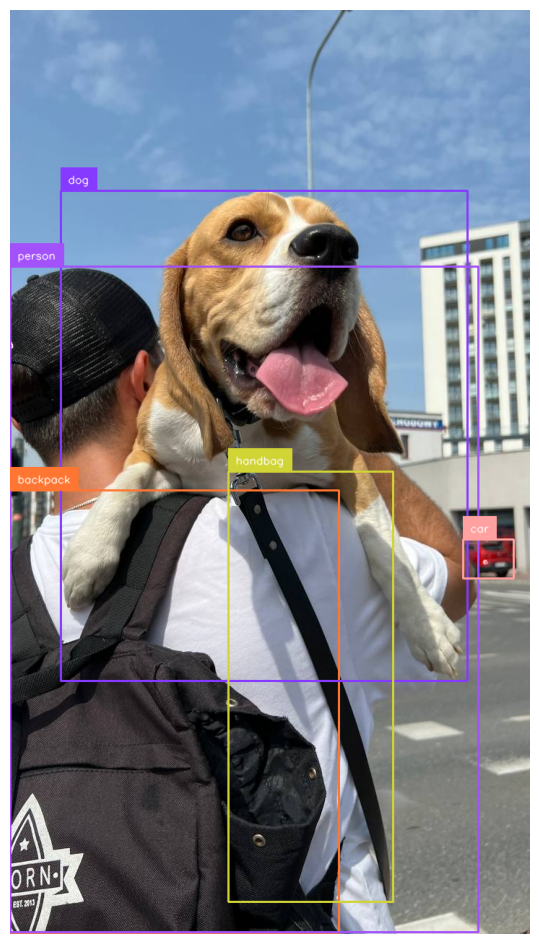

In [5]:
import os

# ✅ Disable FlashAttention (if on older GPUs)
os.environ["FLASHATTN_DISABLED"] = "1"

# ✅ Force CPU mode if GPU is incompatible
import torch
device = "cuda" if torch.cuda.is_available() and torch.cuda.get_device_capability(0)[0] >= 8 else "cpu"

# ✅ Import necessary libraries
from ultralytics import YOLO
import supervision as sv
import cv2

# ✅ Load image
image_path = "dog.jpeg"  # Replace with your image path
image = cv2.imread(image_path)

# ✅ Load YOLO model and move to appropriate device
model = YOLO("yolov12x.pt").to(device)

# ✅ Perform inference
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

# ✅ Annotate results
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# ✅ Display annotated image
sv.plot_image(annotated_image)